<IPython.core.display.Javascript object>


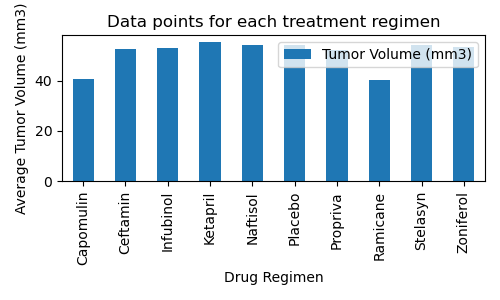

<IPython.core.display.Javascript object>


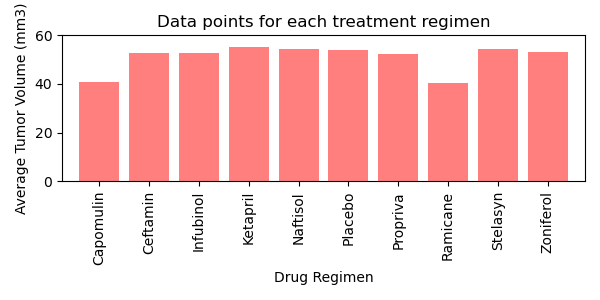

<IPython.core.display.Javascript object>


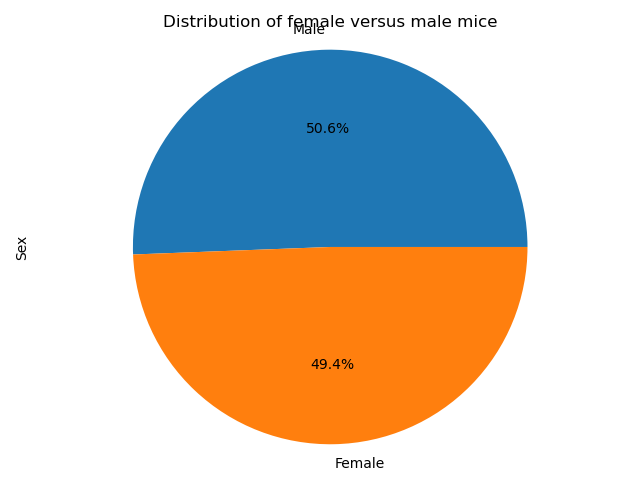

<IPython.core.display.Javascript object>


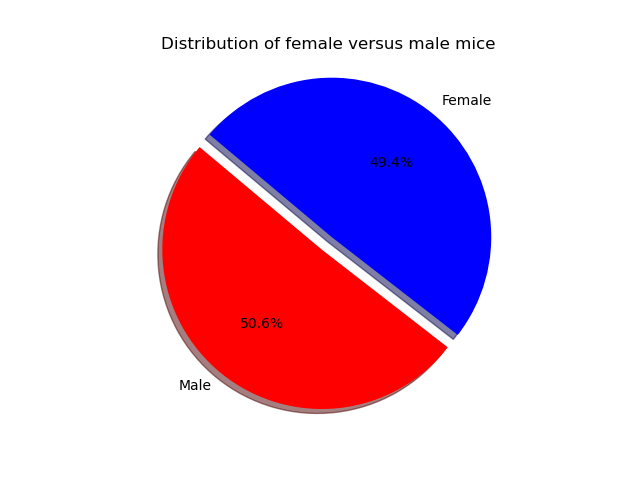

The lower quartile of Tumor Volume (mm3) is: 340.0010610275
The upper quartile of Tumor Volume (mm3) is: 449.98455965499994
The interquartile range of Tumor Volume (mm3) is: 109.98349862749996
The the median of Tumor Volume (mm3) is: 394.845840265 
Values below 175.02581308625005 could be outliers.
Values above 614.9598075962499 could be outliers.


<IPython.core.display.Javascript object>


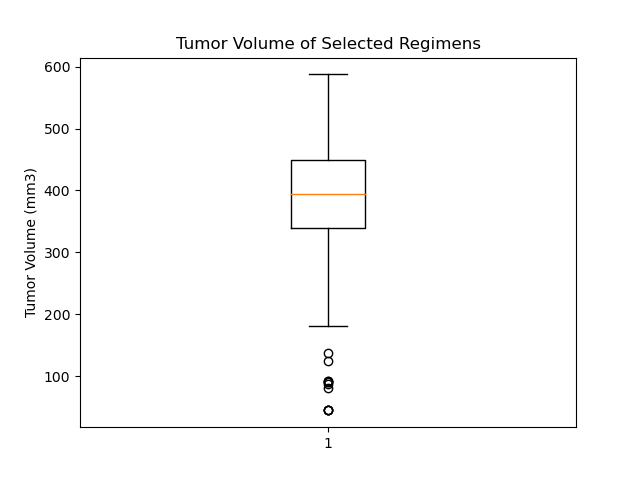

<IPython.core.display.Javascript object>


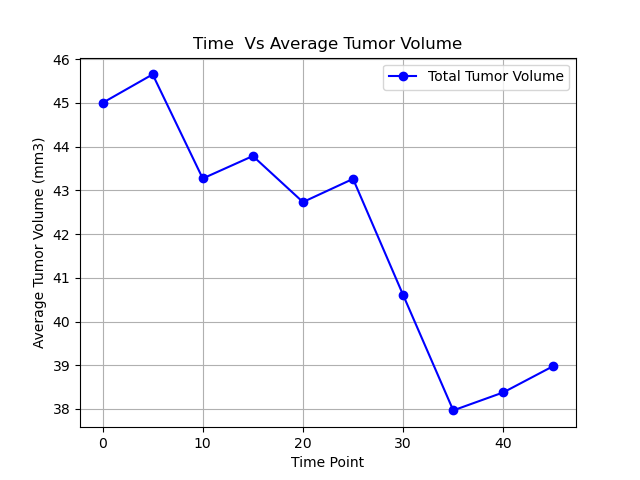

<IPython.core.display.Javascript object>


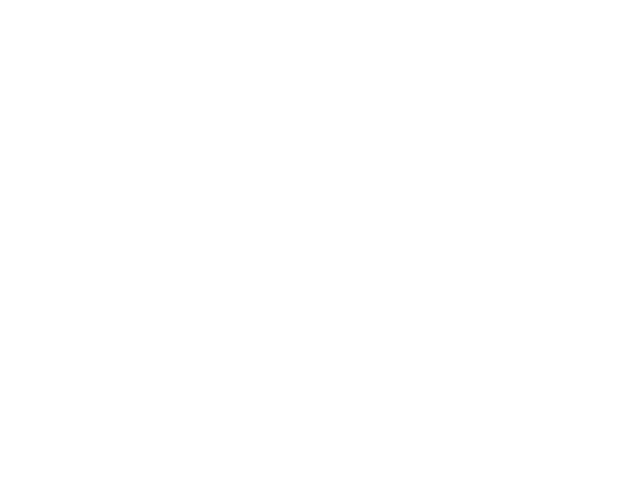

<IPython.core.display.Javascript object>


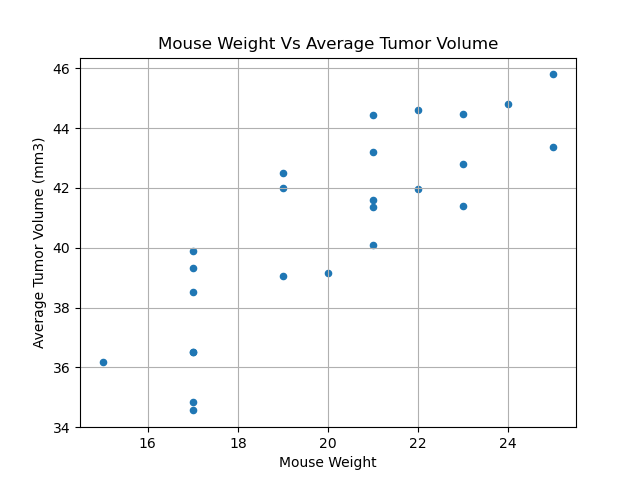

The correlation  is 0.84


<IPython.core.display.Javascript object>


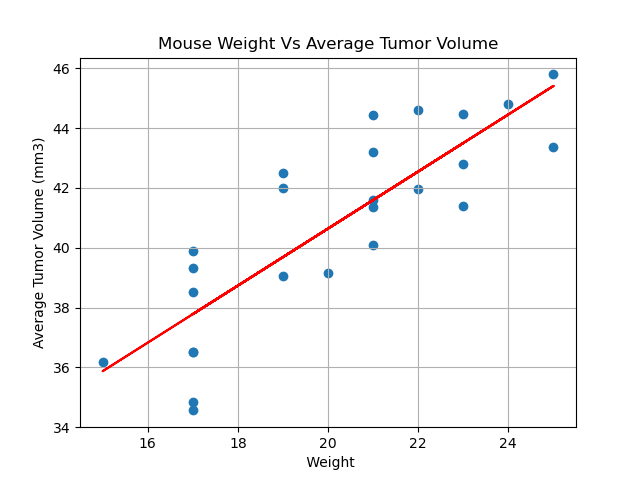

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
#merge after reading 
mouse = "data/Mouse_metadata.csv"
study = "data/Study_results.csv"
mouse= pd.read_csv(mouse)
study = pd.read_csv(study)
combined_data=pd.merge(mouse,study,on='Mouse ID')
#editing data for output tables
combined_data['Mouse ID'].value_counts().head() #shows filtered counts of string data 
combined_data.shape #shows rows and columns amount
any(combined_data['Mouse ID'].duplicated())
combined_data_mice = combined_data.set_index('Mouse ID')
mouse = combined_data_mice.loc['g989', :]
edited_data_mice=combined_data_mice.drop(index='g989')
revised_data=edited_data_mice.reset_index()
revised_data.head()
revised_data.shape
#summary 
summary = combined_data[["Drug Regimen", "Tumor Volume (mm3)"]]
group_by = summary.groupby(["Drug Regimen"])
summary_modified = pd.DataFrame({
    "Mean": group_by["Tumor Volume (mm3)"].mean().map('{:.2f}'.format),
    "Median": group_by["Tumor Volume (mm3)"].median().map('{:.2f}'.format),
    "Mode": group_by["Tumor Volume (mm3)"].agg(pd.Series.mode).map('{:.2f}'.format),
    "Variance": group_by["Tumor Volume (mm3)"].var().map('{:.2f}'.format),
    "Standard Variance": group_by["Tumor Volume (mm3)"].std().map('{:.2f}'.format),
    "SEM": group_by["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)})
summary_modified.head()
#bar plots
combined_data.groupby("Drug Regimen")
group_by = combined_data.groupby("Drug Regimen")
summary_modified = group_by["Tumor Volume (mm3)"].mean().to_frame()
summary_modified.head()
#1st barplot
summary_modified.plot(kind="bar", figsize=(5,3))
plt.title("Data points for each treatment regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
plt.tight_layout()
#second bar plot
x_axis = np.arange(len(summary_modified))
ticks = [value for value in x_axis]
plt.figure(figsize=(6, 3))
plt.bar(x_axis, summary_modified["Tumor Volume (mm3)"], color='red', alpha=0.5)
plt.xticks(ticks, list(summary_modified.index), rotation="vertical") 
plt.xlim(-0.75, len(x_axis) - 0.25)
plt.ylim(0, 60)
plt.title("Data points for each treatment regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Average Tumor Volume (mm3)")
plt.tight_layout()
plt.show()
#pie chart pandas 
mice_quantity=combined_data['Sex'].value_counts()
plt.figure()
mice_quantity.plot(kind='pie',autopct='%1.1f%%')
plt.tight_layout()
plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.tight_layout()
plt.show()
#Piechart pyplot
colors = ["red","blue"]
explode = (0.1,0)
plt.figure()
plt.pie(mice_quantity.values, explode=explode, labels=mice_quantity.index.values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.show()
#Quartiles, Outliers and Boxplots
regimen = combined_data[(combined_data["Drug Regimen"] == "Capomulin") | 
                          (combined_data["Drug Regimen"] == "Ramicane") | 
                          (combined_data["Drug Regimen"] == "Infubinol") | 
                          (combined_data["Drug Regimen"] == "Ceftamin")]
regimen = regimen[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
regimen = regimen.groupby(["Mouse ID", "Drug Regimen"])
regimen_data = regimen["Tumor Volume (mm3)"].sum().to_frame()
regimenPlot = regimen_data["Tumor Volume (mm3)"]
regimen_data.head()
quartiles = regimenPlot.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Selected Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(regimenPlot)
plt.show()
tumor = combined_data[(combined_data["Drug Regimen"] == "Capomulin") & (combined_data["Mouse ID"] == "b128")]
tumor = tumor.groupby(["Drug Regimen", "Timepoint"])
tumor_data = tumor["Tumor Volume (mm3)"].mean().to_frame()
tumor_index_data = tumor_data.unstack(0)
tumor_plot = tumor_index_data["Tumor Volume (mm3)"]

x_axis = [0,5,10,15,20,25,30,35,40,45]
plt.figure()
Sigma_tumor, = plt.plot(x_axis, tumor_plot["Capomulin"], marker= "o", color="blue", label="Total Tumor Volume" )
plt.legend(handles=[Sigma_tumor], loc="best")
plt.title("Time  Vs Average Tumor Volume")
# plt.xlim(-10, 50)
# plt.ylim(30, 50)
plt.xlabel("Time Point")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()
#scatter table
scatter = combined_data[(combined_data["Drug Regimen"] == "Capomulin")]
scatter = scatter[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
group_by = scatter.groupby(["Mouse ID","Weight (g)"])
scatter_data = group_by["Tumor Volume (mm3)"].mean().to_frame()
scatter_data = scatter_data.reset_index()
scatter_data.head()
plt.figure()
scatter_data.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind = "scatter", marker="o")
plt.title("Mouse Weight Vs Average Tumor Volume")
# plt.xlim(10, 25)
# plt.ylim(30, 50)
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()
correlation = st.pearsonr(scatter_data["Weight (g)"], scatter_data["Tumor Volume (mm3)"])
print(f"The correlation  is {round(correlation[0],2)}")
#linear regression
x_values = scatter_data["Weight (g)"]
y_values = scatter_data["Tumor Volume (mm3)"]
plt.figure()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.xlim(13, 26)
# plt.ylim(30, 50)
plt.title("Mouse Weight Vs Average Tumor Volume")
plt.xlabel(" Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

In [2]:
#input one 
revised_data.head(1880)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
#input one summary table
summary = combined_data[["Drug Regimen", "Tumor Volume (mm3)"]]
group_by = summary.groupby(["Drug Regimen"])
summary_modified = pd.DataFrame({
    "Mean": group_by["Tumor Volume (mm3)"].mean().map('{:.2f}'.format),
    "Median": group_by["Tumor Volume (mm3)"].median().map('{:.2f}'.format),
    "Mode": group_by["Tumor Volume (mm3)"].agg(pd.Series.mode).map('{:.2f}'.format),
    "Variance": group_by["Tumor Volume (mm3)"].var().map('{:.2f}'.format),
    "Standard Variance": group_by["Tumor Volume (mm3)"].std().map('{:.2f}'.format),
    "SEM": group_by["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)})
summary_modified.head()


,Mean,Median,Mode,Variance,Standard Variance,SEM
Drug Regimen,,,,,,
Capomulin,40.68,41.56,45.00,24.95,4.99,0.33
Ceftamin,52.59,51.78,45.00,39.29,6.27,0.47
Infubinol,52.88,51.82,45.00,43.13,6.57,0.49
Ketapril,55.24,53.70,45.00,68.55,8.28,0.60
Naftisol,54.33,52.51,45.00,66.17,8.13,0.60


In [4]:
#input one bar plot table
combined_data.groupby("Drug Regimen")
group_by = combined_data.groupby("Drug Regimen")
summary_modified = group_by["Tumor Volume (mm3)"].mean().to_frame()
summary_modified.head()


,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565


In [5]:
#input one scatter
scatter = combined_data[(combined_data["Drug Regimen"] == "Capomulin")]
scatter = scatter[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
group_by = scatter.groupby(["Mouse ID","Weight (g)"])
scatter_data = group_by["Tumor Volume (mm3)"].mean().to_frame()
scatter_data = scatter_data.reset_index()
scatter_data.head(25)

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474
